# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [33]:
# load dataset
dataset = pd.read_csv('./employee_data.csv')
# dataset is a "dataframe"

# you'll notice the data is not clean, we need to clean it up

print(dataset)

         City   Age   Salary Eligible
0      Munbai  27.0  51000.0      Yes
1     NewYork  27.0  48000.0      Yes
2      Munbai  30.0  52000.0       No
3     NewYork   NaN  66000.0       No
4       Tokyo  48.0      NaN      Yes
5       Tokyo   NaN  51000.0       No
6   singapore  33.0  69000.0       No
7     NewYork  40.0   7900.0      Yes
8      Munbai  38.0      NaN      Yes
9   Singapore  35.0  38000.0       No
10      Tokyo   NaN  56000.0       No
11  Singapore  35.0  72000.0       No
12    NewYork  45.0   7300.0      Yes
13     Munbas  31.0  85000.0      Yes
14  Singapore  37.0  49000.0       No


In [34]:
# describe the dataset we just loaded
print(dataset.describe())

             Age        Salary
count  12.000000     13.000000
mean   35.500000  50169.230769
std     6.585107  22569.019496
min    27.000000   7300.000000
25%    30.750000  48000.000000
50%    35.000000  51000.000000
75%    38.500000  66000.000000
max    48.000000  85000.000000


In [35]:
# exclude last column
x = dataset.iloc[:, :-1].values

# this removes that last column
print(x)

[['Munbai' 27.0 51000.0]
 ['NewYork' 27.0 48000.0]
 ['Munbai' 30.0 52000.0]
 ['NewYork' nan 66000.0]
 ['Tokyo' 48.0 nan]
 ['Tokyo' nan 51000.0]
 ['singapore' 33.0 69000.0]
 ['NewYork' 40.0 7900.0]
 ['Munbai' 38.0 nan]
 ['Singapore' 35.0 38000.0]
 ['Tokyo' nan 56000.0]
 ['Singapore' 35.0 72000.0]
 ['NewYork' 45.0 7300.0]
 ['Munbas' 31.0 85000.0]
 ['Singapore' 37.0 49000.0]]


In [36]:
# last column
y = dataset.iloc[:, -1].values
print(y)

['Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'Yes' 'No']


## Handling missing values

In [37]:
# count the number of missing values in each column
print(dataset.isnull().sum())

City        0
Age         3
Salary      2
Eligible    0
dtype: int64


In [43]:
# remove missing data before passing it to the machine learning model
# drop the missing records and use the remainder of the data set
dataset.dropna(inplace=True)

print(dataset.isnull().sum())
print(dataset.shape)


(10, 4)
City        0
Age         0
Salary      0
Eligible    0
dtype: int64
(10, 4)


In [52]:
# replace missing values

from sklearn.impute import SimpleImputer

# can use median, mode, most_frequent, mean, etc.
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# fit the imputer to the data
imputer.fit(x[:, 1:3])

# transform the data
x[:, 1:3] = imputer.transform(x[:, 1:3])
print(x)


[['Munbai' 27.0 51000.0]
 ['NewYork' 27.0 48000.0]
 ['Munbai' 30.0 52000.0]
 ['NewYork' 35.5 66000.0]
 ['Tokyo' 48.0 50169.230769230766]
 ['Tokyo' 35.5 51000.0]
 ['singapore' 33.0 69000.0]
 ['NewYork' 40.0 7900.0]
 ['Munbai' 38.0 50169.230769230766]
 ['Singapore' 35.0 38000.0]
 ['Tokyo' 35.5 56000.0]
 ['Singapore' 35.0 72000.0]
 ['NewYork' 45.0 7300.0]
 ['Munbas' 31.0 85000.0]
 ['Singapore' 37.0 49000.0]]


## Data Encoding

### One Hot Encoding


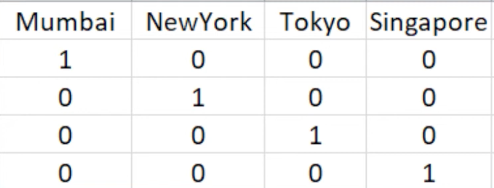

Encoding Table

In [61]:
# in terms of performance, the "city" column is in the text format, which is not efficient for the machine to process
# complex values => simple values
# in this data, we have 4 unique cities, so we can use 4 unique numbers to represent them

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# city column transformation
# [0] = "city" column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# fit and transform the data
x = np.array(ct.fit_transform(x))
print(x)


[[0.0 1.0 0.0 0.0 0.0 0.0 0.0 27.0 51000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 30.0 52000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 35.5 66000.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 48.0 50169.230769230766]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 35.5 51000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 1.0 33.0 69000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 40.0 7900.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 38.0 50169.230769230766]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 35.0 38000.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 35.5 56000.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 35.0 72000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 45.0 7300.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 0.0 31.0 85000.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 37.0 49000.0]]


### Label Encoding


In [64]:
# replace last y (last col of dataset) with data encoding. "yes" or "no" => binary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

## Splitting data into Train and Test set

In [71]:
# we've already split the data into x and y and filled in missing values
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# 25% of the data will be used for testing
# random state is used by the random number generator to ensure that the data is split in the same way each time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

print("x train: ", x_train)
print("x test: ", x_test)
print("y train: ", y_train)
print("y test: ", y_test)

x train:  [[1.0 0.0 0.0 0.0 0.0 1.0 0.0 35.5 56000.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 48.0 50169.230769230766]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 0.0 31.0 85000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 27.0 51000.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 37.0 49000.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 35.0 38000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 38.0 50169.230769230766]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 45.0 7300.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 35.0 72000.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 35.5 51000.0]]
x test:  [[1.0 0.0 0.0 1.0 0.0 0.0 0.0 35.5 66000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 40.0 7900.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 1.0 33.0 69000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 30.0 52000.0]]
y train:  [0 1 1 1 1 0 0 1 1 0 0]
y test:  [0 1 0 0]


## Feature Scaling - Standardization & Normalization

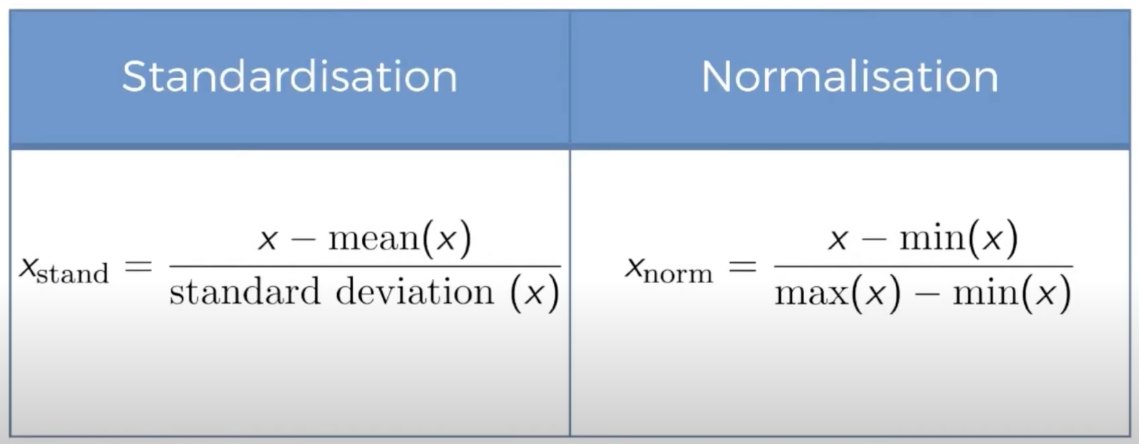

- Standardization: scale -3 to +3. Can be used on all data
- Normalization: always positive, 0 to 1. Can only use when data is normally distributed

In [105]:
# try to  make all the values (age and salary) on the same scale
# why do we need to do this?
# because the values are on different scales, the model will be biased towards the larger values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the data
x_train[:,4:] = scaler.fit_transform(x_train[:,4:])
x_test[:,4:] = scaler.fit_transform(x_test[:,4:])

dataset
# print("x_train: ", x_train)
# print("x_test: ", x_test)


,City,Age,Salary,Eligible
0,Munbai,27.0,51000.0,Yes
1,NewYork,27.0,48000.0,Yes
2,Munbai,30.0,52000.0,No
4,Tokyo,48.0,NaN,Yes
6,singapore,33.0,69000.0,No
7,NewYork,40.0,7900.0,Yes
8,Munbai,38.0,NaN,Yes
9,Singapore,35.0,38000.0,No
11,Singapore,35.0,72000.0,No
12,NewYork,45.0,7300.0,Yes


## Outlier Detection & Removal

In [106]:
import matplotlib.pyplot as plt
dataset = pd.read_csv('./employee_data.csv')
print(dataset.describe())

             Age        Salary
count  12.000000     13.000000
mean   36.916667  50169.230769
std    13.255931  22569.019496
min    16.000000   7300.000000
25%    29.250000  48000.000000
50%    35.000000  51000.000000
75%    41.250000  66000.000000
max    69.000000  85000.000000


(array([1., 0., 0., 3., 1., 2., 2., 0., 1., 1., 0., 0., 0., 0., 1.]),
 array([16.        , 19.53333333, 23.06666667, 26.6       , 30.13333333,
        33.66666667, 37.2       , 40.73333333, 44.26666667, 47.8       ,
        51.33333333, 54.86666667, 58.4       , 61.93333333, 65.46666667,
        69.        ]),
 <BarContainer object of 15 artists>)

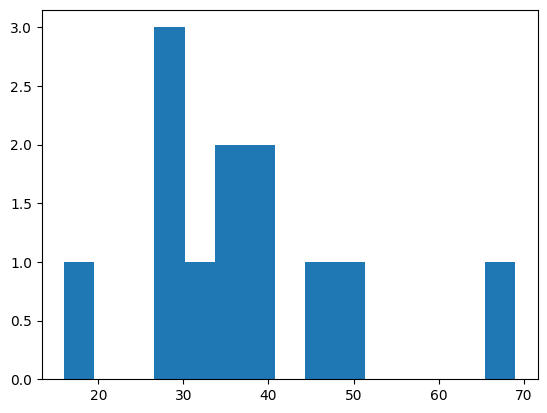

In [107]:
# find and remove all outliers
plt.hist(dataset['Age'], bins=15)

In [108]:
# quantile method to remove outliers
# find lower and upper limit for these age outliers
lowerLimit = dataset["Age"].quantile(0.05)
print(lowerLimit)
print("Lower outlier:\n", dataset[dataset["Age"] < lowerLimit])

upperLimit = dataset["Age"].quantile(0.95)
print(upperLimit)
print("upper outlier:\n", dataset[dataset["Age"] > upperLimit])


22.05
Lower outlier:
          City   Age   Salary Eligible
14  Singapore  16.0  49000.0       No
57.44999999999999
upper outlier:
       City   Age   Salary Eligible
13  Munbai  69.0  85000.0      Yes


In [109]:
dataset = dataset[(dataset["Age"] > lowerLimit) & (dataset["Age"] < upperLimit)]
# you can see we removed the outliers
print(dataset)

         City   Age   Salary Eligible
0      Munbai  27.0  51000.0      Yes
1     NewYork  27.0  48000.0      Yes
2      Munbai  30.0  52000.0       No
4       Tokyo  48.0      NaN      Yes
6   singapore  33.0  69000.0       No
7     NewYork  40.0   7900.0      Yes
8      Munbai  38.0      NaN      Yes
9   Singapore  35.0  38000.0       No
11  Singapore  35.0  72000.0       No
12    NewYork  45.0   7300.0      Yes
